<a href="https://colab.research.google.com/github/vgutierrezmendivil/SupervisedML/blob/main/Vicky_01_Supervisado_2023_UdeSA_Taller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Supervisado I
# UdeSA, 2023
## Profesores: Marcela Svarc, Juan Manuel Pérez


## Taller 1: Algoritmos de clasificación + evaluación


**Fecha de entrega: 05/10/2023, 23:59 hs**

Enviar individualmente a perezj@udesa.edu.ar con subject [TALLER-SUPERVISADO] <APELLIDO>



Este notebook contiene los ejercicios del taller 1. Los mismos deberán ser realizados usando Python. Pueden hacerlo en colab como en sus propias computadoras.



In [ ]:
import sklearn
import numpy as np

# 1. Métricas

### 1.1 Programar las siguientes métricas como funciones de python con la siguiente aridad:


```python
def metrica(y_true,y_pred):
  ...
  return score
```



1.   accuracy
2.   precision
3.   recall
4.   F1-score
5.   F$_{\beta}$-score
6.   Matriz de confusión


In [ ]:
y_true = np.array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0])
y_pred = np.array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

def accuracy(y_true, y_pred):
    score_ac=np.mean(y_true==y_pred)
    return(score_ac)

def precision(y_true, y_pred):
    score_pr = sum((y_true==1) & (y_pred==1))/sum(y_pred==1)
    return(score_pr)

def recall(y_true, y_pred):
    score_rc = sum((y_true==1) & (y_pred==1))/sum(y_true==1)
    return(score_rc)

def f1(y_true, y_pred):
    score_f1=2*precision(y_true, y_pred)*recall(y_true, y_pred)/(precision(y_true, y_pred)+recall(y_true, y_pred))
    return(score_f1)

def confusion_matrix(y_true, y_pred, num_classes):
    matrix_c = np.zeros((num_classes, num_classes), dtype=int)

    for i in range(num_classes):
        for j in range(num_classes):
            matrix_c[i, j] = np.sum((y_true == i) & (y_pred == j))

    return matrix_c

accuracy(y_true, y_pred)
precision(y_true, y_pred)
recall(y_true, y_pred)
f1(y_true, y_pred)
print(confusion_matrix(y_true, y_pred, 2))

[[4 2]
 [1 3]]


### 1.2 Crear diversos casos de test que prueben diferentes aspectos de cada metrica

In [ ]:
"""
TODO: Crear tests usando asserts
"""
y_true = np.array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0])
y_pred = np.array([1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

assert np.isclose(accuracy(y_true, y_pred), 7/10)
assert np.isclose(precision(y_true, y_pred), 6/10)
assert np.isclose(recall(y_true, y_pred), 75/100)
assert np.isclose(f1(y_true, y_pred), 2/3, atol=0.05)



## Clasificadores

Vamos a implementar los clasificadores usando el mismo esquema de la librería `sklearn`. Para ello, vamos a crear una clase `Clasificador` que tenga los siguientes métodos:

*   `fit(X,y)`: recibe los datos de entrenamiento y los labels y entrena el clasificador (para lda calculamos media y ds, para naive las frecuencias)
*   `predict(X)`: recibe los datos de test y devuelve las predicciones

Empecemos con clasificadores baseline, es decir, clasificadores que no aprenden nada o casi nada de los datos

### 1.3 Random

Implementar un clasificador que prediga una clase al azar. Para ello, usar la función `np.random.int`

In [ ]:
class RandomClassifier:
    def __init__(self, num_classes):
        self.num_classes = num_classes

    def fit(self, X, y):
        pass

    def predict(self, X):
        n = X.shape[0]
        return np.random.randint(low=0, high=self.num_classes, size=n)

In [ ]:
# Prueba: genero 1000 etiquetas con 0 y 1000 etiquetas con 1

y_true = np.concatenate([np.zeros(1000), np.ones(1000)])
y_pred = RandomClassifier(2).predict(y_true)
assert np.isclose(accuracy(y_true, y_pred), 0.5, atol=0.05)

Este clasificador tiene accuracy cercano a 0,5 cuando hay 2 clases balanceadas porque, en cada caso, la probabilidad de acertar, por ejemplo, de que salga 1 cuando las opciones son 0 y 1, es de 0,5. Como n es grande, por LGN, vamos a acertar aproximadamente en la mitad de los casos.

## 1.4 Majority Class Classifier

Programar un algoritmo que prediga la clase mayoritaria sobre los datos



Mirar la documentación de `np.bincount`. ¿Para qué sirve?

np.bincount devuelve la frecuencia con la que ocurre cada valor en un array. La salida es un vector que tiene en cada posicion la cantidad de veces que apareció en el vector de entrada el valor del indice correspondiente

In [ ]:
class MajorityClassifier:
    def __init__(self):
        self.majority = None

    def fit(self, X, y):
        bc=np.bincount(y)
        self.majority=np.where(bc==np.amax(bc))[0]

    def predict(self, X):
        n=len(X)
        prediccion=np.full(n, self.majority[0])
        return(prediccion)



In [ ]:
x_maj=np.zeros(1000)
y_maj=np.random.randint(0,10,1000)

classi=MajorityClassifier()
classi.fit(x_maj, y_maj)
classi.predict(x_maj)



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## 2. Naive Bayes

Supongamos que tenemos un problema de clasificación con $K$ clases, y $p$ predictores/features.

Recordemos que por el teorema de Bayes, podemos escribir la probabilidad de que una instancia $x$ pertenezca a una clase $k$ (posterior) como:

$$P(y=k|x) = \frac{P(x|y=k)P(y=k)}{P(x)}$$

- $P(x|y=k)$ es la probabilidad condicional de $x$ dado que la clase es $k$. Podemos escribirla como $f_k(x)$, donde $f_k$ es la función de densidad de probabilidad de la clase $k$.
- $P(y=k)$ lo podemos modelar como la frecuencia de la clase $k$ en el conjunto de entrenamiento (usualmente, escrita como $\pi_k$)
- $P(x)$ es la probabilidad marginal de $x$, que podemos calcular como la suma de las probabilidades condicionales de $x$ para cada clase $k$ (Probabilidad total)
$$P(x) = \sum_{k=1}^K P(x|y=k)P(y=k)$$

Reescribiendo todo esto, podemos calcular la probabilidad de que una instancia $x$ pertenezca a una clase $k$ como:

$$P(y=k|x) = \frac{f_k(x)\pi_k}{\sum_{j=1}^K f_j(x)\pi_j}$$

$x$ es un vector de $p$ dimensiones, y cada una de sus componentes es una variable aleatoria. Si asumimos que cada componente de $x$ es independiente de las demás, podemos escribir la función de densidad de probabilidad de la clase $k$ como:

$$f_k(x) = \prod_{j=1}^p f_{kj}(x_j)$$

Entonces, para cada clase $k$, tenemos que estimar $p$ funciones de densidad de probabilidad $f_{kj}(x_j)$, una para cada predictor $j$ (tenemos $K \times p$ predictores).

## 2.1 Precalentamiento

### 2.1.1 Estimar funcion de densidad para variables categóricas

Sea $X$ un vector de observaciones de una variable Bernoulli. Utilizar `np.bincount` para estimar la función de densidad de probabilidad de $X$.

In [ ]:

X = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
p=np.bincount(X)[1]/len(X)

print('X tiene distribución Bernoulli con parámetro:',p)


X tiene distribución Bernoulli con parámetro: 0.6


Utilizar `scipy.stats.rv_discrete` para estimar la función de densidad de probabilidad de $X$

La función recibe un parámetro `values` que toma un par de arrays `(Xk, pk)` donde `Xk` son los valores que toma la variable aleatoria y `pk` son las probabilidades asociadas a cada valor.

Utilizar la función `.pmf` para evaluar la función de densidad de probabilidad en un punto.

In [ ]:
import scipy

probas = np.bincount(X) / X.shape[0]

values = np.unique(X)

F = scipy.stats.rv_discrete(values=(values, probas))

F.pmf(0), F.pmf(1), F.pmf(2)

(0.4, 0.6, 0.0)

X es un vector de 0 y 1 con cuatro 0 y seis 1. Como vimos anteriormente, la probabilidad de X=1 es 0,6, por ende, la probabilidad de X=0 es 0,4. Se agregó una prueba para evaluar la probabilidad de X=2 que, naturalmente, es 0

### 2.1.2 Programar naive bayes para variables categoricas


In [ ]:
import scipy

class NaiveBayes:
    """
    Naive bayes para variables categóricas
    """
    def __init__(self):
        self.priors = None
        self.densities = None
        self.classes = None

    def fit(self, X, y):
        """
        Entrenar Naive Bayes categórico

        Argumentos:
        ----------

        X: array de numpy de forma (n_samples, n_features)
            Datos de entrenamiento. Cada feature debe ser una variable categórica
        y: array de variables categóricas
            Etiquetas de las clases
        """

        assert X.dtype == int, "X debe ser int"

        """
        Una pequeña ayudita para entender el código:

        Hay que calcular dos cosas:

        - Las probabilidades a priori de cada clase
        - Las funciones de densidad de cada variable categórica X_1, ... X_n para cada clase

        """

        # TODO: Calcular prior
        self.priors = np.bincount(y) / len(y)
        # TODO: calcular cantidad de clases (usar np.unique)
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        num_features = X.shape[1]



        # TODO: Calcular Las funciones de densidad de cada variable categórica X_1, ... X_n para cada clase
        # Armo una matriz de n_classes x num_features que sería la cantidad de f_ij que necesito
        self.densities = [[None] * num_features for i in range(n_classes)]

        for i, c in enumerate(self.classes):
          # armo una matriz de X por categoria
            X_c = X[y == c]

            for j in range(num_features):
              #calculo la funcion de densidad de cada X para cada categoria
              probas = np.bincount(X_c[:,j]) / X_c.shape[0]
              values = np.unique(X_c[:,j])
              self.densities[i][j] = scipy.stats.rv_discrete(values=(values, probas))


    def predict(self, X):
        """
        Predecir las etiquetas de las clases para cada dato de X
        """
        assert self.priors is not None, "Hay que llamar a fit primero"

        n_obs = X.shape[0]
        n_classes = len(self.classes)
        n_features = X.shape[1]
        y = np.zeros(n_obs)

        for i in range(n_obs):
          #copio el vector de priors
          p_k = self.priors.copy()
          for k in range(n_classes):
            for j in range(n_features):
              #evaluo cada funcion de densidad en el valor en que estoy parada y la multiplico por el prior correspondiente
              F = self.densities[k][j]
              p_k[k] = F.pmf(X[i, j])*p_k[k]
          #me quedo solo con el maximo valor de lo que calcule anteriormente y clasifico la observacion
          y[i]=np.argmax(p_k)
        return y


Vamos a probar todo esto en un dataset generado aleatoriamente. Este dataset consta de 200 observaciones con 5 variables Bernoulli $X_1, X_2, X_3, X_4, X_5$

$$Y|X_1, X_2, X_3, X_4, X_5 \sim Bernoulli(\frac{X_1 + \ldots + X_5}{5})$$

In [ ]:

n_samples = 200
num_vars = 5

np.random.seed(2023)

X = np.random.randint(0, 2, (n_samples, num_vars))

# Creamos  Bernoulli(P/num_vars)
# o generar 0,1 o div x 10
P = X.sum(axis=1) / num_vars
y = np.random.binomial(1, P)

# Train / test split

X_train, y_train = X[:160], y[:160]
X_test, y_test = X[160:], y[160:]

Entrenar el modelo sobre los datos de entrenamiento y predecir sobre los datos de test para:

- RandomClassifier
- MajorityClassifier
- NaiveBayes

Reportar accuracy, precision, recall y F1-score para cada clasificador



- ¿Anda mejor Naive Bayes que los clasificadores baseline? ¿se cumplen las hipótesis de Naive Bayes en este caso?

- **OPCIONAL**. Calcular el error de Bayes. ¿Cómo se compara con el de Naive Bayes?

In [ ]:

clf_nb = NaiveBayes()

clf_nb.fit(X_train, y_train)
y_pred_nb=clf_nb.predict(X_test)


In [ ]:
clf_rc = RandomClassifier(2)

clf_rc.fit(X_train, y_train)
y_pred_rc=clf_rc.predict(X_test)


In [ ]:
clf_mc = MajorityClassifier()

clf_mc.fit(X_train, y_train)
y_pred_mc=clf_mc.predict(X_test)



In [ ]:
import pandas as pd

# Creo un data frame para mostrar las metricas correspondientes a cada clasificador
data = {
    'Naive Bayes': [accuracy(y_test, y_pred_nb), precision(y_test, y_pred_nb), recall(y_test, y_pred_nb), f1(y_test, y_pred_nb)],
    'Random Classifier': [accuracy(y_test, y_pred_rc), precision(y_test, y_pred_rc), recall(y_test, y_pred_rc), f1(y_test, y_pred_rc)],
    'Majority Classifier': [accuracy(y_test, y_pred_mc), precision(y_test, y_pred_mc), recall(y_test, y_pred_mc), f1(y_test, y_pred_mc)]
}

index_names = ['Accuracy', 'Precision', 'Recall', 'F1']
column_names = ['Naive Bayes', 'Random Classifier', 'Majority Classifier']

df = pd.DataFrame(data, index=index_names, columns=column_names)

print(df)

           Naive Bayes  Random Classifier  Majority Classifier
Accuracy      0.725000           0.600000                 0.35
Precision     0.857143           0.727273                  NaN
Recall        0.692308           0.615385                 0.00
F1            0.765957           0.666667                  NaN


<ipython-input-26-8062377d67f8>:9: RuntimeWarning: invalid value encountered in long_scalars
  score_pr = sum((y_true==1) & (y_pred==1))/sum(y_pred==1)


El clasificador de Naive Bayes tiene valores mas altos para las cuatro métricas, en comparación a Random Classifier y Mayority Classifier. La hipoteis de Naive Bayes es que las X son independientes entre si. En este caso, como las X fueron generadas de manera aleatoria, podemos decir que se cumple esta hipotesis. En el caso de Mayority Classifier, cuando la y predicha es un vector de ceros, precision da nan porque esto implica dividir por cero (se divide por la cantidad de casos en los que y predicha es 1) y f1 tambien da nan porque tiene en cuenta el valor de precision

### 2.1.3 Programar naive bayes para variables gaussianas.
¿Cómo podria estimar $P(a_i|v_j)$? Piense en fitear diferentes distribuciones que le permitan luego inferir valores nuevos.

Ayuda: Puede usar `scipy.stats.norm( mu , std ).pdf( new_val )` como funcion de densidad de probabilidad de una normal y evaluarla en new_val




In [ ]:

class GaussianNaiveBayes:
    """
    Naive bayes para variables gaussianas
    """
    def __init__(self):
        self.priors = None
        self.densities = None
        self.classes = None

    def fit(self, X, y):
        """
        Entrenar Naive Bayes gaussiano

        Argumentos:
        ----------

        X: array de numpy de forma (n_samples, n_features)
            Datos de entrenamiento. Cada feature debe ser una variable categórica
        y: array de variables categóricas
            Etiquetas de las clases
        """


        """
        Una pequeña ayudita para entender el código:

        Hay que calcular dos cosas:

        - Las probabilidades a priori de cada clase
        - Las funciones de densidad de cada variable categórica X_1, ... X_n para cada clase
  """
        # TODO: Calcular prior
        self.priors = np.bincount(y) / len(y)
        # TODO: calcular cantidad de clases (usar np.unique)
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        num_features = X.shape[1]

        # TODO: Calcular Las funciones de densidad de cada variable categórica X_1, ... X_n para cada clase
        # Armo una matriz de n_classes x num_features que sería la cantidad de f_ij que necesito
        self.densities = [[None] * num_features for i in range(n_classes)]

        for i, c in enumerate(self.classes):
          # armo una matriz de X por categoria
            X_c = X[y == c]
            #calculo la funcion de densidad de cada X para cada categoria (asumo distribucion normal)
            for j in range(num_features):
              mu = np.mean(X_c[:,j])
              std = np.std(X_c[:,j])
              self.densities[i][j] = scipy.stats.norm(mu, std)

    def predict(self, X):
        """
        Predict class for each sample in X

        Arguments:
        ----------

        X: numpy array of shape (n_samples, n_features)
            Training data. Each feature must be a categorical variable

        Returns:
        --------

        y_pred: numpy array of shape (n_samples,)
            Predicted class for each sample
        """
        assert self.priors is not None, "You must call fit before predict"


        """
        TODO: Completar
        """
        n_obs = X.shape[0]
        n_classes = len(self.classes)
        n_features = X.shape[1]
        y = np.zeros(n_obs)

        for i in range(n_obs):
          #copio el vector de priors
          p_k = self.priors.copy()
          for k in range(n_classes):
            for j in range(n_features):
              #evaluo cada funcion de densidad en el valor en que estoy parada y la multiplico por el prior correspondiente
              F = self.densities[k][j]
              p_k[k] = F.pdf(X[i, j])*p_k[k]
          #me quedo solo con el maximo valor de lo que calcule anteriormente y clasifico la observacion
          y[i]=np.argmax(p_k)
        return y


Ajusto el modelo sobre un nuevo set de datos y predigo etiquetas  

In [ ]:
np.random.seed(2023)
# Filas
n_samples = 200
# Columnas, features, características, variables
num_vars = 5

# Genera n_samples de datos para num_vars características con una distribución normal
# Podemos configurar diferentes medias y desviaciones estándar para cada característica
means = np.random.uniform(-10, 10, num_vars)
stddevs = np.random.uniform(1, 2, num_vars)

X = np.array([np.random.normal(means[j], stddevs[j], n_samples) for j in range(num_vars)]).T

# Creamos un valor objetivo basado en una combinación lineal de las características y luego aplicamos una función sigmoide
weights = np.random.uniform(-1, 1, num_vars)
linear_combination = X.dot(weights)
P = 1 / (1 + np.exp(-linear_combination))

# Creo una columna de respuesta Y en base a la probabilidad P
y = np.random.binomial(1, P)

# Train / test split
X_train, y_train = X[:160], y[:160]
X_test, y_test = X[160:], y[160:]

In [ ]:
clf_gnb = GaussianNaiveBayes()

clf_gnb.fit(X_train, y_train)
y_pred_nb=clf_gnb.predict(X_test)

import pandas as pd

# Definir los valores proporcionados
data = {
    'Gaussian Naive Bayes': [accuracy(y_test, y_pred_nb), precision(y_test, y_pred_nb), recall(y_test, y_pred_nb), f1(y_test, y_pred_nb)]

}

# Nombres de filas y columnas
index_names = ['Accuracy', 'Precision', 'Recall', 'F1']
column_names = ['Gaussian Naive Bayes']

# Crear el DataFrame
df = pd.DataFrame(data, index=index_names, columns=column_names)

# Mostrar el DataFrame
print(df)

           Gaussian Naive Bayes
Accuracy               0.800000
Precision              0.852941
Recall                 0.906250
F1                     0.878788


### 3.3 LDA

Programar LDA para variables gaussianas

Utilizar las funciones `np.mean` y `np.cov` para estimar los parámetros de las gaussianas

In [ ]:
class LDAClassifier:
    def init(self):
        self.means = None
        self.priors = None
        self.classes = None

    def fit(self, X, y):

        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_features = X.shape[1]
        self.covariance_matrix_inv = None

        # Inicializo medias, matriz de covarianza y priors con ceros.
        self.means = np.zeros((n_classes, n_features))
        covariance_matrix = np.zeros((n_features, n_features))
        self.priors = np.zeros(n_classes)

        for i, c in enumerate(self.classes):
          # armo una matriz de X por categoria
            X_c = X[y == c]
            # Calculo la media y la agrego
            self.means[i, :] = np.mean(X_c, axis=0)

            # Calculo la covarianza y la voy agregando
            covariance_matrix += np.cov(X_c, rowvar=False) * len(X_c)

            self.priors[i] = len(X_c) / len(X)

        # Calculando la inversa de la matriz de covarianza común a todas las clases (promedio las matrices de covarianza)
        self.covariance_matrix_inv = np.linalg.inv(covariance_matrix / len(X))

    def predict(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.classes)

        probabilities = np.zeros((n_samples, n_classes))

        for i in range(n_classes):
            # Calculo la diferencia entre cada muestra y la media de la clase
            diff = X - self.means[i, :]

            # Calculo la probabilidad asumiendo normalidad
            probabilities[:, i] = np.exp(-0.5 * np.sum(diff.dot(self.covariance_matrix_inv) * diff, axis=1))

            # Multiplico por priors
            probabilities[:, i] *= self.priors[i]

        # Normalizo las probabilidades para que sumen 1 a lo largo de las filas.
        probabilities /= probabilities.sum(axis=1, keepdims=True)

        # Retorno la clase con la mayor probabilidad
        return self.classes[np.argmax(probabilities, axis=1)]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as skLDA
from sklearn.metrics import accuracy_score

np.random.seed(0)

# Genera datos de muestra: 1000 muestras, 2 clases
mean1, mean2 = [1, 1], [3, 3]  # medias de las dos clases
cov = [[1, 0], [0, 1]]  # matriz de covarianza diagonal
class1 = np.random.multivariate_normal(mean1, cov, 500)
class2 = np.random.multivariate_normal(mean2, cov, 500)
X = np.vstack((class1, class2))  # apilando los datos
y = np.hstack((np.zeros(500), np.ones(500)))  # etiquetas de clase

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tu clasificador
your_lda = LDAClassifier()
your_lda.fit(X_train, y_train)
your_predictions = your_lda.predict(X_test)
your_accuracy = accuracy_score(y_test, your_predictions)

# Clasificador de Scikit-Learn
sklearn_lda = skLDA()
sklearn_lda.fit(X_train, y_train)
sklearn_predictions = sklearn_lda.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

# Imprime las exactitudes
print(f"Tu exactitud: {your_accuracy}")
print(f"Exactitud de scikit-learn: {sklearn_accuracy}")

# Assert
#assert abs(your_accuracy - sklearn_accuracy) < 0.1, "Las exactitudes deberían ser cercanas"

Tu exactitud: 0.91
Exactitud de scikit-learn: 0.91


#### Opcional: Implementar QDA

Leer en el ISLP el capítulo de QDA y programar el algoritmo

In [ ]:
import numpy as np

class QDAClassifier:
    def _init_(self):
        self.means = None
        self.covariance_matrices = None
        self.priors = None
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_features = X.shape[1]

        # Inicializo medias, matrices de covarianza y priors con ceros.
        self.means = np.zeros((n_classes, n_features))
        self.covariance_matrices = [np.zeros((n_features, n_features)) for _ in range(n_classes)]  # Lista de matrices de covarianza
        self.priors = np.zeros(n_classes)

        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.means[i, :] = np.mean(X_c, axis=0)
            self.covariance_matrices[i] = np.cov(X_c, rowvar=False)
            self.priors[i] = len(X_c) / len(X)

    def predict(self, X):
        n_obs = X.shape[0]
        n_classes = len(self.classes)
        probabilities = np.zeros((n_obs, n_classes))

        for i in range(n_classes):
            dif = X - self.means[i, :]
            cov_inv = np.linalg.inv(self.covariance_matrices[i])
            exponente = -0.5 * np.sum(dif.dot(cov_inv) * dif, axis=1)
            probabilities[:, i] = np.exp(exponent) * self.priors[i]

        # Normalizo las probabilidades para que sumen 1 a lo largo de las filas.
        row_sums = probabilities.sum(axis=1, keepdims=True)
        probabilities = probabilities / row_sums

        # Retorno la clase con la mayor probabilidad
        return self.classes[np.argmax(probabilities, axis=1)]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as skQDA
from sklearn.metrics import accuracy_score

np.random.seed(0)

# Genero datos de muestra: 1000 muestras, 2 clases
mean1, mean2 = [1, 1], [3, 3]  # medias de las dos clases
cov1 = [[1, 0], [0, 1]]  # matriz de covarianza diagonal
cov2 = [[2, 0], [0, 2]]
class1 = np.random.multivariate_normal(mean1, cov1, 500)
class2 = np.random.multivariate_normal(mean2, cov2, 500)
X = np.vstack((class1, class2))  # apilando los datos
y = np.hstack((np.zeros(500), np.ones(500)))  # etiquetas de clase

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tu clasificador
your_qda = QDAClassifier()
your_qda.fit(X_train, y_train)
your_predictions = your_qda.predict(X_test)
your_accuracy = accuracy_score(y_test, your_predictions)

# Clasificador de Scikit-Learn
sklearn_qda = skQDA()
sklearn_qda.fit(X_train, y_train)
sklearn_predictions = sklearn_qda.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

# Imprime las exactitudes
print(f"Tu exactitud: {your_accuracy}")
print(f"Exactitud de scikit-learn: {sklearn_accuracy}")




Tu exactitud: 0.855
Exactitud de scikit-learn: 0.875


## 3.4 Dataset Iris (Lirios)


![texto alternativo](https://cdn0.ecologiaverde.com/es/posts/4/1/0/tipos_de_lirios_3014_orig.jpg)

El dataset Iris es un dataset clásico de clasificación. Contiene 150 observaciones de 3 clases de flores distintas (50 observaciones por clase). Cada observación tiene 4 features: largo y ancho del sépalo y largo y ancho del pétalo.

Fue introducido por el estadístico y biólogo británico Ronald Fisher en 1936.

Dato importante: si tienen gatos, no tengan lirios cerca. Son sumamente tóxicos.

In [ ]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=[x.strip(" (cm)") for x in iris.feature_names])
df["species"] = [iris.target_names[x] for x in y]
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 3.4.1 Análisis exploratorio

Explorar el dataset. ¿Qué tipo de problema es? ¿Qué tipo de features tiene?

Use `sns.displot` y `sns.pairplot` para visualizar las distribuciones de las variables y las relaciones entre ellas.

¿Qué clase es más fácil de separar de las otras dos? ¿Cuál es más difícil?

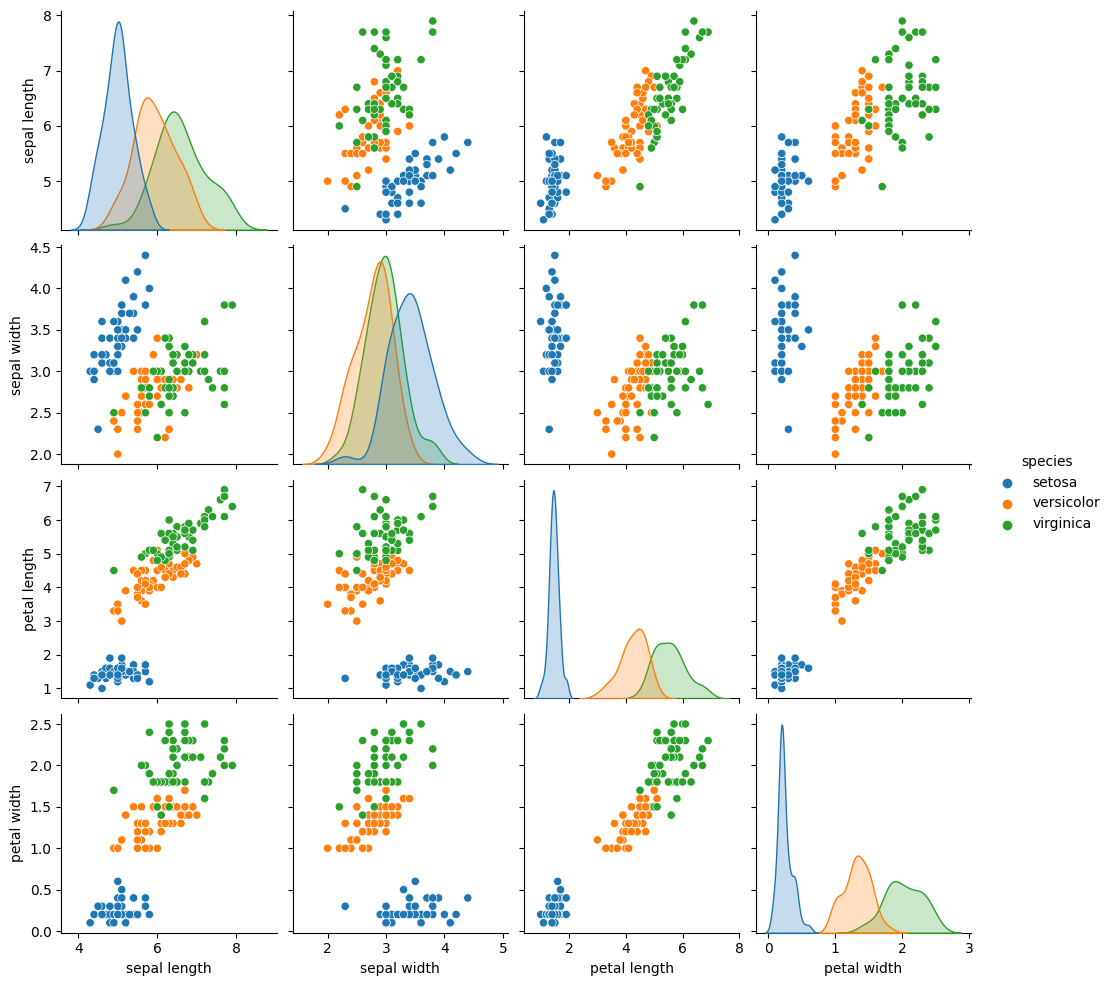

In [ ]:
import seaborn as sns

sns.pairplot(data=df, hue='species')

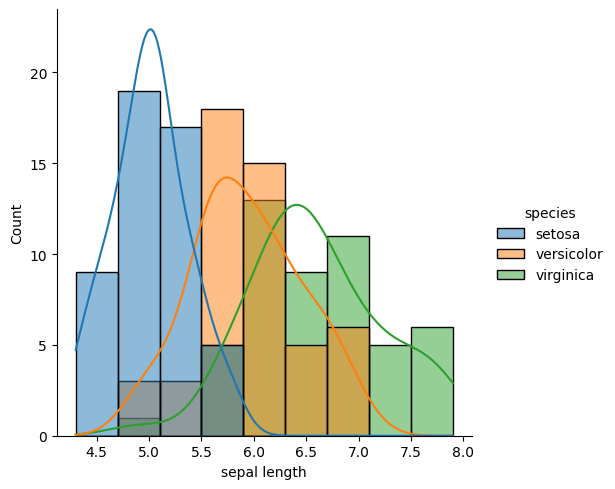

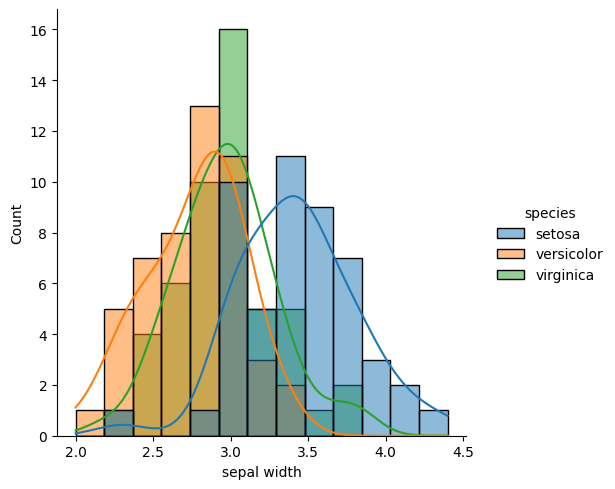

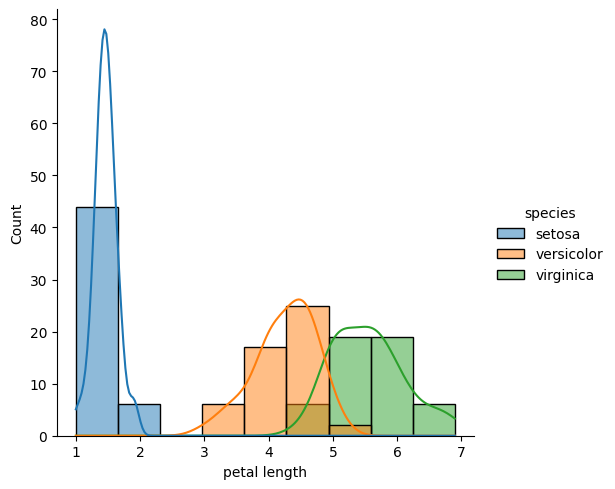

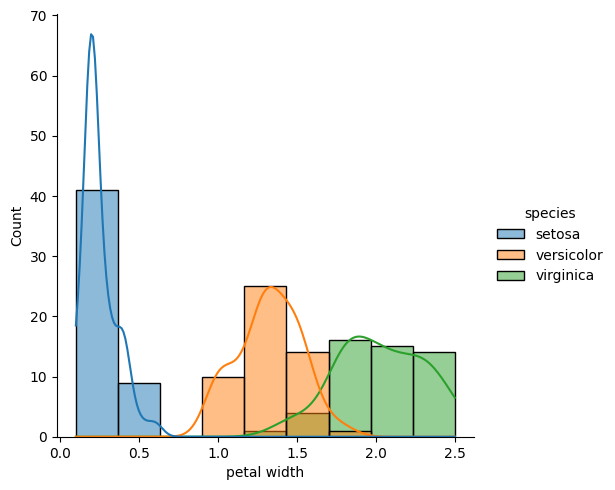

In [ ]:
sns.displot(data=df, x='sepal length', hue='species', kde=True)
sns.displot(data=df, x='sepal width', hue='species', kde=True)
sns.displot(data=df, x='petal length', hue='species', kde=True)
sns.displot(data=df, x='petal width', hue='species', kde=True)


El dataset de Iris presenta un problema de clasificación en tres categorías (especies: setosa, versicolor y virginica) y con 4 features: largo y ancho del sépalo, y largo y ancho del pétalo. Si observamos los gráficos, vemos que el segundo set incluye lo que vemos en el primero. De las tres especies, la setosa es la variedad más diferenciada. Entre las otras dos, la forma de los pétalos (Petal width y Petal legth) parece ser la característica más distintiva, ya que se observa menor solapamiento de datos en dichas categorías. Las distribuciones de las variables clasificadoras parecen ser normales pero con distinta varianza entre clases, exepto en el caso de sepal width, donde la varianza es similar entre las clases (diagonal del pairplot)

También podemos observar la correlacion entre las variables para entender la posible codependecias en el set de datos:

In [ ]:
# Observamos la correlación entre las variables
df.corr()

<ipython-input-50-e0d7ad46760c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.871754,-0.428440,1.000000,0.962865
petal width,0.817941,-0.366126,0.962865,1.000000


Se observan algunas correlaciones entre las características de los pétalos (length y width), como entre el largo del pétalo (petal length) y el largo del sépalo (sepal length), pero en menor medida.

### 3.4.2 Split train/test

Utilice la función `train_test_split` de `sklearn.model_selection` para dividir los datos en train y test. Utilice un 66% para train y un 33% para test.

Setee como `random_state` el número 42 (¿para qué sirve?). Usar `stratify` para que los datos se dividan de manera estratificada (¿qué es esto?)


Consultar [la documentación de `train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) para ver cómo se usa

In [ ]:
# Train / test split
from sklearn.model_selection import train_test_split

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)


El parámetro random_state se utiliza para determinar la generación de números aleatorios. Estableciendo random_state en un valor específico (42 en este caso), garantizamos que los resultados sean reproducibles. El parámetro stratify en cambio se utiliza para mantener la misma proporción de clases en los conjuntos de datos de entrenamiento y prueba, que en el conjunto de datos original. De esta forma, nos aseguramos que en las particiones se mantengan las proporción de cada especie que hay en el conjunto completo y aseguramos un mejor entrenamiento y evaluación de los clasificadores.

### 3.4.3 Entrenamiento de modelos

Entrenar los modelos que ya programamos y predecir sobre los datos de test. Reportar accuracy, precision, recall y F1-score para cada clasificador (pueden usar `sklearn.metrics.classification_report`)

In [ ]:
lda_clf = LDAClassifier()
lda_clf.fit(X_train_i, y_train_i)
lda_predictions = lda_clf.predict(X_test_i)
lda_predictions

array([1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0,
       2, 1, 2, 2, 1, 2])

In [ ]:
nb_clf = GaussianNaiveBayes()
nb_clf.fit(X_train_i, y_train_i)
nb_predictions = nb_clf.predict(X_test_i)
nb_predictions

array([1., 1., 0., 1., 2., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 2., 2.,
       1., 2., 1., 2., 1., 0., 2., 0., 2., 2., 0., 0., 2., 2., 2., 0., 1.,
       0., 0., 2., 1., 2., 1., 1., 1., 0., 0., 1., 1., 2., 1., 1., 2.])

In [ ]:
qda_clf = QDAClassifier()
qda_clf.fit(X_train_i, y_train_i)
qda_predictions = qda_clf.predict(X_test_i)
qda_predictions

array([1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0,
       2, 1, 2, 2, 1, 2])

In [ ]:
from sklearn.metrics import classification_report

print("\nReporte para Gaussian Naive Bayes:")
print(classification_report(y_test_i, nb_predictions))

print("\nReporte para LDA Classifier:")
print(classification_report(y_test_i, lda_predictions))

print("\nReporte para QDA Classifier:")
print(classification_report(y_test_i, qda_predictions))


Reporte para Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.84      0.94      0.89        17
           2       0.93      0.82      0.87        17

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50


Reporte para LDA Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.94      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50


Reporte para QDA Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00

Para este caso son mejores los clasificadores LDA y QDA que Naive Bayes ya que los valores de accuracy, precision, recall y f1-score son mas altos. Esto puede deberse a que no se cumple la hipotesis de naive bayes porque hay correlacion entre las variables regresoras

## 3.4.4 Análisis de errores

Calcular la matriz de confusión para el mejor clasificador. ¿Qué clase se confunde más con qué clase? ¿Por qué?

Usar `sklearn.metrics.confusion_matrix`

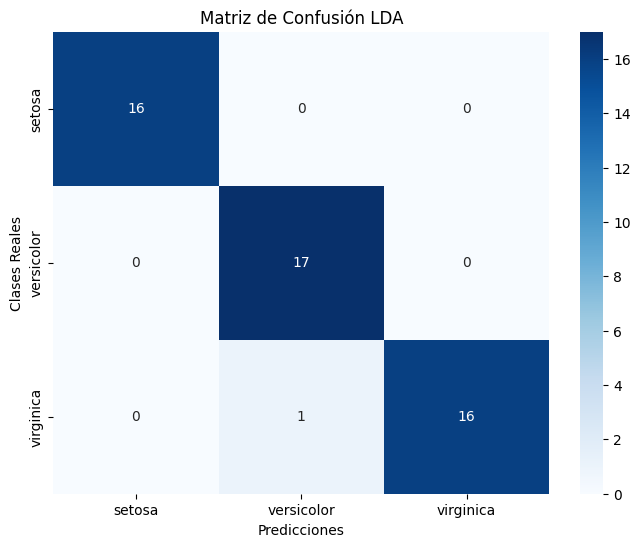

In [ ]:
import matplotlib.pyplot as plt

cm_lda=sklearn.metrics.confusion_matrix(y_test_i, lda_predictions)
clase_nombres = iris.target_names

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Blues', xticklabels=clase_nombres, yticklabels=clase_nombres)
plt.title('Matriz de Confusión LDA')
plt.xlabel('Predicciones')
plt.ylabel('Clases Reales')
plt.show()

Considerando el clasificador LDA, las clases que más se confunden son versicolor y virginica, aunque se trata de un solo caso. Esto guarda relación con el analisis preliminar que hicimos de forma exploratoria, donde se observaba que la setosa es la más diferenciable del resto.

## 4. KNN

### 4.1 Implementar KNN

Implementar un clasificador KNN. Pasar como parámetro $k$ en el constructor de la clase.

Correr sobre el dataset Iris y reportar accuracy, precision, recall y F1-score. ¿Cómo se compara con los clasificadores anteriores?

In [ ]:
import numpy as np
from collections import Counter

class KNNClassifier:
    def __init__(self, k):
        self.k = k
        self.X_train=None
        self.Y_train=None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            # Calculamos las distancias euclideas y luego las ordenamos
            distancias = [np.sqrt(np.sum((x - x_train) ** 2)) for x_train in self.X_train]
            k_indices = np.argsort(distancias)[:self.k]
            # Colocamos las etiquetas de los vecinos y vemos cual es el mas votado
            k_cercano_labels = [self.y_train[i] for i in k_indices]
            mas_votado = Counter(k_cercano_labels).most_common(1)
            y_pred.append(mas_votado[0][0])
        return np.array(y_pred)

In [ ]:
knn_clf = KNNClassifier(5)
knn_clf.fit(X_train_i, y_train_i)
knn_predictions = knn_clf.predict(X_test_i)
knn_predictions

array([2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0,
       2, 1, 2, 1, 1, 2])

In [ ]:
print("\nReporte para KNN Classifier:")
print(classification_report(y_test_i, knn_predictions))


Reporte para KNN Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        17
           2       1.00      0.94      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
data = {
    'Naive Bayes': [accuracy(y_test_i, nb_predictions), precision(y_test_i, nb_predictions), recall(y_test_i, nb_predictions), f1(y_test_i, nb_predictions)],
    'LDA Classifier': [accuracy(y_test_i, lda_predictions), precision(y_test_i, lda_predictions), recall(y_test_i, lda_predictions), f1(y_test_i, lda_predictions)],
    'QDA Classifier': [accuracy(y_test_i, qda_predictions), precision(y_test_i, qda_predictions), recall(y_test_i, qda_predictions), f1(y_test_i, qda_predictions)],
    'KNN Classifier': [accuracy(y_test_i, knn_predictions), precision(y_test_i, knn_predictions), recall(y_test_i, knn_predictions), f1(y_test_i, knn_predictions)]
}

# Nombres de filas y columnas
index_names = ['Accuracy', 'Precision', 'Recall', 'F1']
column_names = ['Naive Bayes', 'LDA Classifier', 'QDA Classifier', 'KNN Classifier']

# Crear el DataFrame
df = pd.DataFrame(data, index=index_names, columns=column_names)

# Mostrar el DataFrame
print(df)

           Naive Bayes  LDA Classifier  QDA Classifier  KNN Classifier
Accuracy      0.920000        0.980000        0.980000        0.980000
Precision     0.842105        0.944444        0.944444        0.944444
Recall        0.941176        1.000000        1.000000        1.000000
F1            0.888889        0.971429        0.971429        0.971429


Como podemos observar el KNN se comporta de forma similar al LDA y al QDA, teniendo las mismas métricas que éstos.